In [1]:
import pybinding as pb
import numpy as np
from numpy import sqrt as sqrt
import matplotlib.pyplot as plt
from numpy import exp, dot, einsum, cos, sin, pi
import sympy as sp

# Graphene


In [2]:
a = 1 #lattice constant
a_0 = a/sqrt(3) # nearest neighbor distance
# onsite energies
Ea = 0
Eb = 0

# lattice vectors
a1 = np.array([a, 0])
a2 = np.array([-a/2, a*sqrt(3)/2])
graphene_lattice = pb.Lattice(a1=a1, a2=a2)
graphene_lattice.add_sublattices(
    ('A', np.array([0, 0]), Ea), ('B', np.array([0, a_0]), Eb))  # add an atom called 'A' at position [0, 0]

# nearest-neighbor hopping
t = -1

graphene_lattice.add_hoppings(
    ([0, 0], 'A', 'B', t),
    ([-1, -1], 'A', 'B', t),
    ([0, -1], 'A', 'B', t),
)

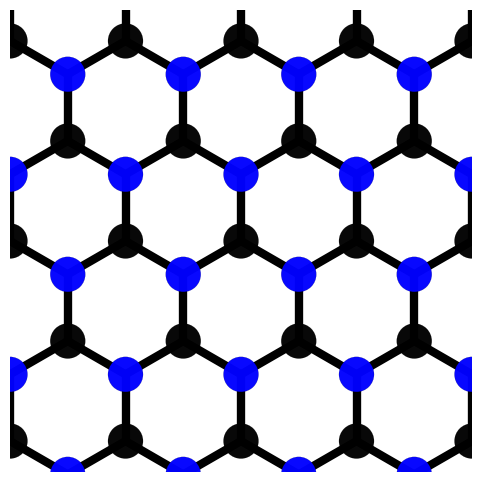

In [3]:
plt.figure(figsize=(6, 6))
graphene_model = pb.Model(
    graphene_lattice,
    pb.translational_symmetry()
)
graphene_model.plot(num_periods=5,
          hopping = {
  "width": 10, "color" : "black", "blend" : 1,
}, sites={"cmap":["black", "blue"], "blend" : 1 })
plt.gca().axis('off');
plt.xlim(-2, 2)
plt.ylim(-2, 2);

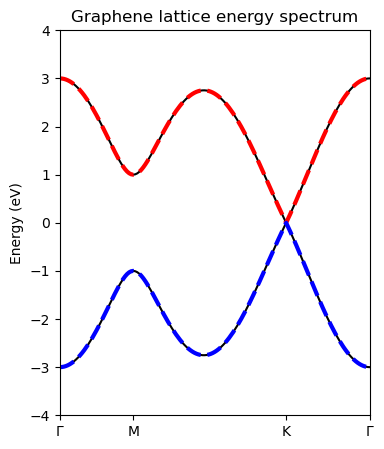

In [4]:
plt.figure(figsize=(4, 5))
solver = pb.solver.lapack(graphene_model)
G1, G2 = graphene_lattice.reciprocal_vectors()
G1 = G1[0:2]
G2 = G2[0:2]
Gamma = np.array([0, 0])
K = -2/3*G1+1/3*G2
M = 1/2*G1
bands = solver.calc_bands(Gamma, M, K, Gamma)
graphene_energies = bands.energy
k_path = bands.k_path
plt.plot(graphene_energies, color="black")

phase1 = einsum("ij, j->i", np.array(k_path), [0, a_0]) 
phase2 = einsum("ij, j->i", np.array(k_path), [a_0*sqrt(3)/2, -a_0/2]) 
phase3 = einsum("ij, j->i", np.array(k_path), [-a_0*sqrt(3)/2, -a_0/2]) 
analytic_graphene_energies = exp(phase1 * 1j) + exp(phase2 * 1j) + exp(phase3 * 1j)
plt.plot(np.abs(analytic_graphene_energies), color="red", linestyle="dashed", linewidth=3)
plt.plot(-np.abs(analytic_graphene_energies), color="blue", linestyle="dashed", linewidth=3)

plt.xticks(k_path.point_indices, [r'$\Gamma$', 'M', 'K', r'$\Gamma$'])
plt.xlim(0, len(k_path)-1)
plt.ylim(-4, 4)
plt.yticks(np.linspace(-4, 4, num=9));
plt.title("Graphene lattice energy spectrum");
plt.ylabel("Energy (eV)");

# Kagome lattice

In [5]:
a = 1 #lattice constant
# onsite energies
Ea = 0
Eb = 0
Ec = 0 

# lattice vectors
a1 = np.array([a, 0])
a2 = np.array([-a/2, a*sqrt(3)/2])
kagome_lattice = pb.Lattice(a1=a1, a2=a2)
kagome_lattice.add_sublattices(
    ('A', np.array([0, 0]), Ea), ('B', np.array([a/2, 0]), Eb), ('C', np.array([-a/4, a*sqrt(3)/4]), Ec))  # add an atom called 'A' at position [0, 0]

# nearest-neighbor hopping
t = -1

kagome_lattice.add_hoppings(
    ([0, 0], 'A', 'B', t),
    ([0, 0], 'A', 'C', t),
    ([0, -1], 'A', 'C', t),
    ([-1, 0], 'A', 'B', t),
    ([1, 0], 'B', 'C', t),
    ([0, -1], 'B', 'C', t),
)

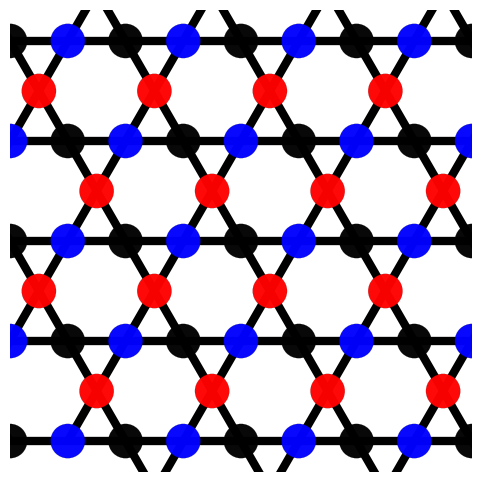

In [6]:
plt.figure(figsize=(6, 6))
kagome_model = pb.Model(
    kagome_lattice,
    pb.translational_symmetry()
)
kagome_model.plot(num_periods=5,
          hopping = {
  "width": 10, "color" : "black", "blend" : 1,
}, sites={"cmap":["black", "blue", "red"], "blend" : 1 })
plt.gca().axis('off');
plt.xlim(-2, 2)
plt.ylim(-2, 2);

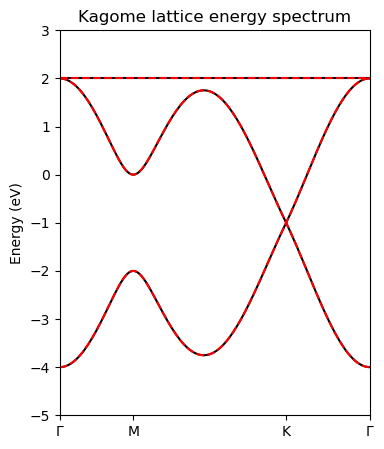

In [155]:
plt.figure(figsize=(4, 5))
solver = pb.solver.lapack(kagome_model)
G1, G2 = kagome_lattice.reciprocal_vectors()
G1 = G1[0:2]
G2 = G2[0:2]
Gamma = np.array([0, 0])
K = -2/3*G1+1/3*G2
M = 1/2*G1
bands = solver.calc_bands(Gamma, M, K, Gamma)
kagome_energies = bands.energy
k_path = bands.k_path
plt.plot(kagome_energies, color="black");
cos_k_a1 = np.cos(np.einsum("ij, j->i", np.array(k_path), a1)/2)
cos_k_a2 = np.cos(np.einsum("ij, j->i", np.array(k_path), a2)/2)
cos_k_a1_a2 = np.cos(np.einsum("ij, j->i", np.array(k_path), a1+a2)/2)
plt.plot(-2*t*np.ones(kagome_energies.shape[0]), linestyle="dashed", color="red");
plt.plot(t*(1+np.sqrt(1+8*cos_k_a1*cos_k_a2*cos_k_a1_a2)), linestyle="dashed", color="red")
plt.plot(t*(1-np.sqrt(1+8*cos_k_a1*cos_k_a2*cos_k_a1_a2)), linestyle="dashed", color="red") # Analytic bands

plt.xticks(k_path.point_indices, [r'$\Gamma$', 'M', 'K', r'$\Gamma$'])
plt.xlim(0, len(k_path)-1)
#plt.ylim(-4, 2)
plt.yticks(np.linspace(-5, 3, num=9));
plt.title("Kagome lattice energy spectrum");
plt.ylabel("Energy (eV)");

## AA bilayer graphene

In [109]:
a = 1 #lattice constant
a_0 = a/sqrt(3) # nearest neighbor distance
# onsite energies
Ea = 0
Eb = 0

# lattice vectors
a1 = np.array([a, 0])
a2 = np.array([-a/2, a*sqrt(3)/2])
graphene_lattice_aa = pb.Lattice(a1=a1, a2=a2)
graphene_lattice_aa.add_sublattices(
    ('A', np.array([0, 0]), Ea), ('B', np.array([0, a_0]), Eb), ('Ap', np.array([0, 0, a/2]), Ea), ('Bp', np.array([0, a_0, a/2]), Eb))  # add an atom called 'A' at position [0, 0]

# nearest-neighbor hopping
t = -1
tprime = -0.1

graphene_lattice_aa.add_hoppings(
    ([0, 0], 'A', 'B', t),
    ([-1, -1], 'A', 'B', t),
    ([0, -1], 'A', 'B', t),
    ([0, 0], 'Ap', 'Bp', t),
    ([-1, -1], 'Ap', 'Bp', t),
    ([0, -1], 'Ap', 'Bp', t),
    ([0, 0], 'Ap', 'A', tprime),
    ([0, 0], 'Bp', 'B', tprime),
)

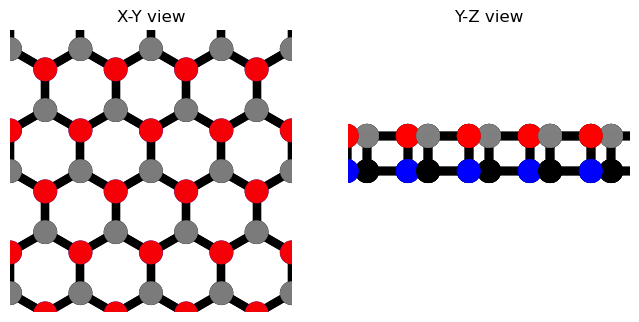

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
graphene_model_aa = pb.Model(
    graphene_lattice_aa,
    pb.translational_symmetry()
)
plt.sca(ax1)
plt.title("X-Y view")
graphene_model_aa.plot(num_periods=5,
          hopping = {
  "width": 10, "color" : "black", "blend" : 1,
}, sites={"cmap":["black", "blue", "grey", "red"], "blend" : 1 }, axes="xy")
plt.gca().axis('off');
plt.xlim(-2, 2)
plt.ylim(-2, 2);

plt.sca(ax2)
plt.title("Y-Z view")
graphene_model_aa.plot(num_periods=5,
          hopping = {
  "width": 10, "color" : "black", "blend" : 1,
}, sites={"cmap":["black", "blue", "grey", "red"], "blend" : 1 }, axes="yz")
plt.gca().axis('off');
plt.xlim(-2, 2)
plt.ylim(-2, 2);

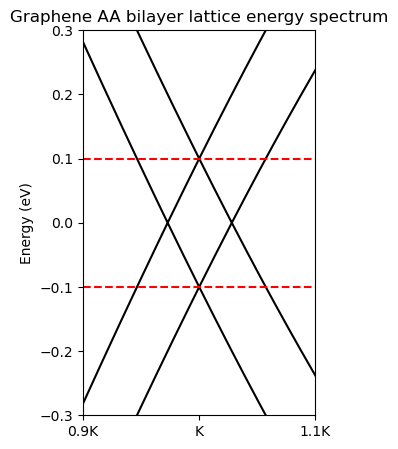

In [413]:
plt.figure(figsize=(3, 5))
solver = pb.solver.lapack(graphene_model_aa)
G1, G2 = graphene_lattice_aa.reciprocal_vectors()
G1 = G1[0:2]
G2 = G2[0:2]
Gamma = np.array([0, 0])
K = -2/3*G1+1/3*G2
M = 1/2*G1
bands = solver.calc_bands(0.9*K, K, 1.1*K, step=0.001 )
graphene_energies_aa = bands.energy
k_path = bands.k_path
plt.plot(graphene_energies_aa, color="black")

plt.xticks(k_path.point_indices, ['0.9K', 'K', '1.1K'])
plt.xlim(0, len(k_path)-1)
#plt.ylim(-0.15, 0.15)
plt.ylim(-0.3, 0.3)

plt.hlines([tprime, -tprime], 0, k_path.point_indices[-1], linestyle="dashed", color="red")
#plt.yticks(np.linspace(-1, 1, num=2));
plt.title("Graphene AA bilayer lattice energy spectrum");
plt.ylabel("Energy (eV)");

In [350]:
dos_energies = np.linspace(3*tprime, -3*tprime, 100)
dos = np.zeros(100)
N = 200
for k1 in range(0, N):
    for k2 in range(0, N):
        solver.set_wave_vector(G1 * k1/N + G2 * k2/N)
        dos += solver.calc_dos(dos_energies, abs(tprime)/5).data

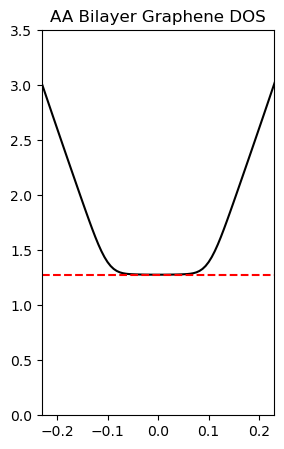

In [352]:
plt.figure(figsize=(3, 5))
plt.title("AA Bilayer Graphene DOS")
plt.plot(dos_energies, sqrt(3)* dos / abs(tprime) / N**2, color="black")
plt.xlim(-0.23, 0.23)
plt.ylim(0, 3.5);
plt.hlines([1.273], -0.23, 0.23, color="red", linestyle="dashed")
#plt.ylim(1.2, 1.4)

The above should hopefully be the same as Figure 1 in:

Roldán, Rafael, and Luis Brey. "Dielectric screening and plasmons in AA-stacked bilayer graphene." Physical Review B—Condensed Matter and Materials Physics 88.11 (2013): 115420.

In [410]:
dos_energies = np.linspace(3*tprime, -3*tprime, 1000)
dos = np.zeros(1000)
N = 500
gv = 2
zoom = 5
for k1 in range(0, N):
    K_norm = np.linalg.norm(K)
    k = (K_norm / zoom) * k1 / N
    for k2 in range(0, N):
        theta = 2*pi*(k2/N)
        solver.set_wave_vector(K + k * np.array([cos(theta), sin(theta)]))
        area_element = 2 * pi * k * (K_norm / zoom)
        bz_area = ((2*pi)**2)/(sqrt(3)/2)
        dos += gv * (area_element / bz_area) * solver.calc_dos(dos_energies, abs(tprime)/100).data

(0.0, 3.5)

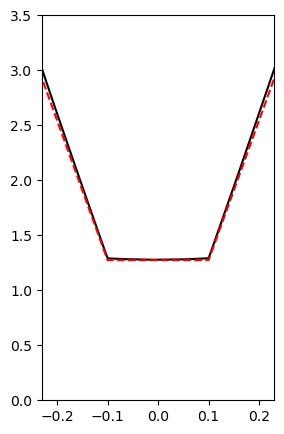

In [412]:
plt.figure(figsize=(3, 5))
analytic = 4/(2*pi)*(abs(dos_energies / abs(tprime)-1)+abs(dos_energies / abs(tprime)+1))
plt.plot(dos_energies, sqrt(3)* dos / abs(tprime) / N**2, color="black")
plt.plot(dos_energies, analytic, linestyle="dashed", color="red")
plt.xlim(-0.23, 0.23)
plt.ylim(0, 3.5)
#plt.ylim(1.2, 1.3)
#plt.hlines([1.273], -0.23, 0.23, color="red", linestyle="dashed")

Calculating the DOS in a purely linear model

In [418]:
def bilayer_aa_energy(k):
    v_F = sqrt(3)/2 * a * t
    energies = np.array([tprime * s + v_F * k * r for r in [-1, 1] for s in [-1, 1]])
    return energies

In [466]:
bins = 200
dos = np.zeros(bins)
N = 1000000
gv = 2
zoom = 5
energy_width = abs(6 * tprime / bins)
for k1 in range(0, N):
    K_norm = np.linalg.norm(K)
    k = (K_norm / zoom) * k1 / N
    energies_k = bilayer_aa_energy(k)
    area_element = 2 * pi * k * (K_norm / zoom)
    bz_area = ((2*pi)**2)/(sqrt(3)/2)
    dos += (1/energy_width) * gv * (area_element / bz_area) * np.histogram(energies_k, bins, range=(3*tprime, -3*tprime))[0]

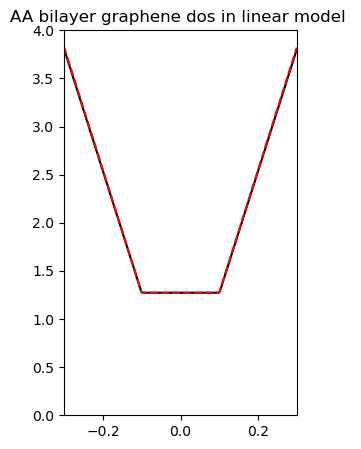

In [472]:
plt.figure(figsize=(3, 5))
energies = np.linspace(3*tprime, -3*tprime, bins)
plt.plot(energies, sqrt(3)* dos / abs(tprime) / N , color="black")
analytic = 4/(2*pi)*(abs(energies / abs(tprime)-1)+abs(energies / abs(tprime)+1))
plt.plot(energies, analytic, linestyle="dashed", color="red")
plt.xlim(3*tprime, -3*tprime)
plt.ylim(0, 4);
plt.title("AA bilayer graphene dos in linear model ");

# AB Stacked Bilayer Graphene

In [2]:
a = 1 #lattice constant
a_0 = a/sqrt(3) # nearest neighbor distance
# onsite energies
Ea = 0
Eb = 0

# lattice vectors
a1 = np.array([a, 0])
a2 = np.array([-a/2, a*sqrt(3)/2])
graphene_lattice_ab = pb.Lattice(a1=a1, a2=a2)
graphene_lattice_ab.add_sublattices(
    ('A', np.array([0, 0]), Ea), ('B', np.array([0, a_0]), Eb), ('Ap', np.array([0, -a_0, a/2]), Ea), ('Bp', np.array([0, 0, a/2]), Eb))  # add an atom called 'A' at position [0, 0]

# nearest-neighbor hopping
t = -1
tprime = -0.1

graphene_lattice_ab.add_hoppings(
    ([0, 0], 'A', 'B', t),
    ([-1, -1], 'A', 'B', t),
    ([0, -1], 'A', 'B', t),
    ([0, 0], 'Ap', 'Bp', t),
    ([-1, -1], 'Ap', 'Bp', t),
    ([0, -1], 'Ap', 'Bp', t),
    ([0, 0], 'A', 'Bp', tprime),
)

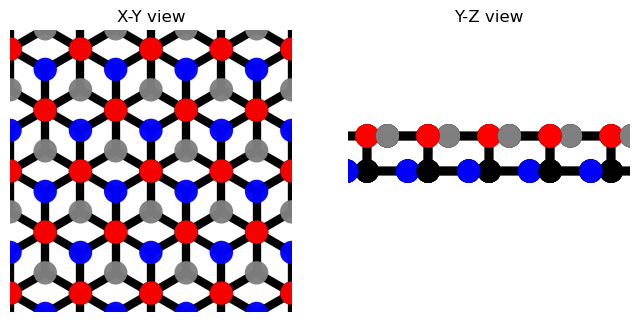

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
graphene_model_ab = pb.Model(
    graphene_lattice_ab,
    pb.translational_symmetry()
)
plt.sca(ax1)
plt.title("X-Y view")
graphene_model_ab.plot(num_periods=5,
          hopping = {
  "width": 10, "color" : "black", "blend" : 1,
}, sites={"cmap":["black", "blue", "grey", "red"], "blend" : 1 }, axes="xy")
plt.gca().axis('off');
plt.xlim(-2, 2)
plt.ylim(-2, 2);

plt.sca(ax2)
plt.title("Y-Z view")
graphene_model_ab.plot(num_periods=5,
          hopping = {
  "width": 10, "color" : "black", "blend" : 1,
}, sites={"cmap":["black", "blue", "grey", "red"], "blend" : 1 }, axes="yz")
plt.gca().axis('off');
plt.xlim(-2, 2)
plt.ylim(-2, 2);

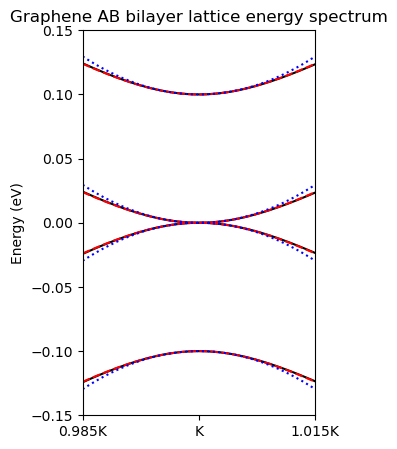

In [147]:
plt.figure(figsize=(3, 5))
solver = pb.solver.lapack(graphene_model_ab)
G1, G2 = graphene_lattice_ab.reciprocal_vectors()
G1 = G1[0:2]
G2 = G2[0:2]
Gamma = np.array([0, 0])
K = -2/3*G1+1/3*G2
M = 1/2*G1
bands = solver.calc_bands(0.985*K, K, 1.015*K, step=0.0001)
k = np.linalg.norm(np.array(bands.k_path-K), axis=1)
vF = 3/2*a_0*t
analytic_ek_ab = np.array([i*tprime*sqrt((vF*k)**2/tprime**2+1/4)+j*tprime/2 for i in [-1, 1] for j in [-1, 1]])

x = sp.symbols('x')
series_function = sp.lambdify(x, (sympy.sqrt(1+x**2)).series(x, 0, n=3).removeO())

analytic_ek_ab_taylor = np.array([i*tprime*(1/2*series_function(2*(vF*k/tprime)))+j*tprime/2 for i in [-1, 1] for j in [-1, 1]]) # To find effective mass

graphene_energies_ab = bands.energy
k_path = bands.k_path
plt.plot(graphene_energies_ab, color="black")
plt.plot(np.transpose(analytic_ek_ab), color="red", linestyle="dashed")
plt.plot(np.transpose(analytic_ek_ab_taylor), color="blue", linestyle="dotted")

plt.xticks(k_path.point_indices, ['0.985K', 'K', '1.015K'])
plt.xlim(0, len(k_path)-1)
plt.ylim(-0.15, 0.15)
#plt.yticks(np.linspace(-1, 1, num=2));
plt.title("Graphene AB bilayer lattice energy spectrum");
plt.ylabel("Energy (eV)");

Analytic expression used above is from: 

Jablan, Marinko, Hrvoje Buljan, and Marin Soljačić. "Transverse electric plasmons in bilayer graphene." Optics express 19.12 (2011): 11236-11241.